## import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rawdf = pd.read_csv("Housing.csv")

# exploratory data analysis 

In [3]:
rawdf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
rawdf.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
rawdf.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Data and information visualization


In [62]:
import seaborn as sns

<AxesSubplot: xlabel='price', ylabel='Count'>

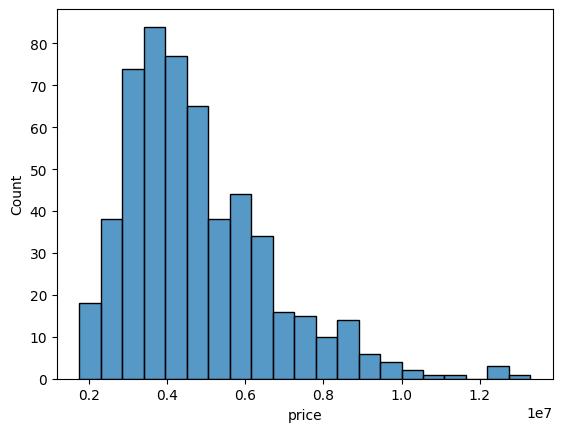

In [64]:
sns.histplot(x=rawdf['price'])

<AxesSubplot: xlabel='bedrooms', ylabel='count'>

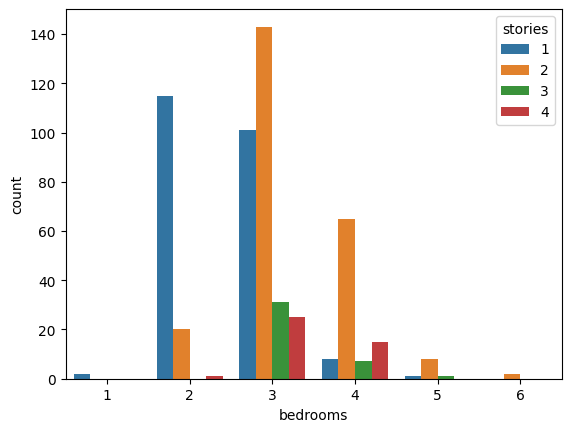

In [66]:
sns.countplot(x=rawdf['bedrooms'],hue=rawdf['stories'])

<AxesSubplot: xlabel='furnishingstatus', ylabel='count'>

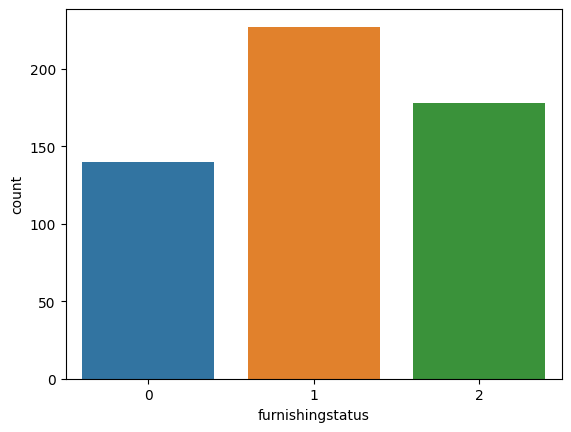

In [68]:
sns.countplot(x=rawdf['furnishingstatus'])

# CONVERTING CATEGORICAL COLUMN INTO NUMERICAL COLUMN

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()

In [71]:
rawdf

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [84]:
co=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

In [85]:
for col in co:
    rawdf[col] = le.fit_transform(rawdf[col])

In [86]:
rawdf

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


# SPLIT THE DATA USING TRAIN_TEST_SPLIT

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = rawdf.drop('price',axis=1)

In [89]:
y = rawdf['price']

In [90]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [91]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [93]:
X_train.shape,y_train.shape

((381, 12), (381,))

In [94]:
X_test.shape,y_test.shape

((164, 12), (164,))

# TRAINING THE DATA

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train,y_train)

LinearRegression()

# TESTING THE DATA

In [95]:
predict = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

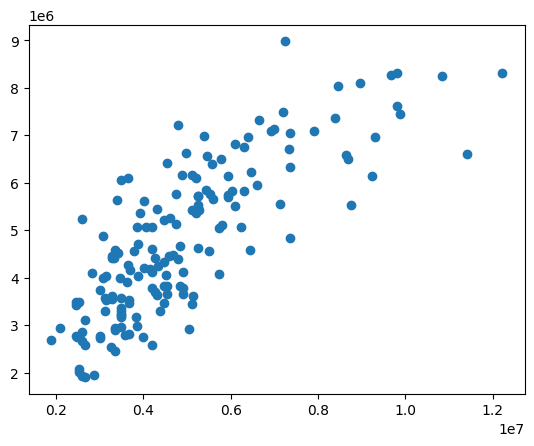

In [43]:
plt.scatter(y_test,model.predict(X_test))

In [44]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y_test,model.predict(X_test))

0.6418365876032074

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [57]:
mse = mean_squared_error(y_test,predict)

In [59]:
print("MSE:{}".format(mse))

MSE:1417911645663.5752


In [60]:
print("MAE:{}".format(mean_absolute_error(y_test,predict)))

MAE:897385.3630807556


In [61]:
print("RMSE:{}".format(np.sqrt(mse)))

RMSE:1190760.9523592782
